In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("microbes.xlsx")
display(df)

,Domain,Family,Genus,Species,Gram Stain,Shape,Metabolism,pH Affinity,Temperature Affinity,Salt Tolerance,...,Toxin,Toxin Type,Spore Formation,Pathogen,Antibiotic Produced,Industrial Use,Motile,Pigment Production,Biosafety level,Foodborne
0,Bacteria,Acetobacteraceae,Acetobacter,aceti,Negative,Rod,Aerobe,Acidophile,Mesophile,Moderate,...,No,None,No,No,No,Yes,Yes,No,1,No
1,Bacteria,Alcaligenaceae,Alcaligenes,faecalis,Negative,Rod,Aerobe,Neutrophile,Mesophile,Moderate,...,No,None,No,Opportunistic,No,No,Yes,No,2,No
2,Bacteria,Bacillaceae,Bacillus,anthracis,Positive,Rod,Facultative Anaerobe,Neutrophile,Mesophile,Low,...,Yes,Exotoxin,Yes,Yes,No,No,No,No,3,No
3,Bacteria,Bacillaceae,Bacillus,cereus,Positive,Rod,Facultative Anaerobe,Neutrophile,Mesophile,Moderate,...,Yes,Exotoxin,Yes,Yes,Yes,Yes,Yes,No,2,Yes
4,Bacteria,Bacillaceae,Bacillus,halodurans,Positive,Rod,Aerobe,Alkaliphile,Mesophile,High,...,No,None,Yes,No,Yes,Yes,Yes,No,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Bacteria,Streptococcaceae,Streptococcus,pyogenes,Positive,Streptococcus,Facultative Anaerobe,Neutrophile,Mesophile,Low,...,Yes,Exotoxin,No,Yes,No,Yes,Yes,No,2,Yes
66,Bacteria,Streptococcaceae,Streptococcus,viridans,Positive,Streptococcus,Facultative Anaerobe,Neutrophile,Mesophile,Low,...,No,None,No,Opportunistic,No,Yes,Yes,No,2,No
67,Bacteria,Vibrionaceae,Vibrio,cholerae,Negative,Vibrio,Facultative Anaerobe,Alkaliphile,Mesophile,High,...,Yes,Exotoxin,No,Yes,No,Yes,Yes,No,2,Yes
68,Bacteria,Vibrionaceae,Vibrio,parahaemolyticus,Negative,Vibrio,Facultative Anaerobe,Alkaliphile,Mesophile,High,...,Yes,Exotoxin,No,Yes,No,Yes,Yes,No,2,Yes


In [3]:
# display(df.dtypes)

In [4]:
# Columns

columns = [col for col in df.columns]
row_size = len(columns) // 4

for i in range(4):
    print(columns[i * row_size : (i + 1) * row_size])

['Domain', 'Family', 'Genus', 'Species', 'Gram Stain']
['Shape', 'Metabolism', 'pH Affinity', 'Temperature Affinity', 'Salt Tolerance']
['GC Content', 'Toxin', 'Toxin Type', 'Spore Formation', 'Pathogen']
['Antibiotic Produced', 'Industrial Use', 'Motile', 'Pigment Production', 'Biosafety level']


## Family

In [5]:
family_all = df.groupby("Family").size()
multiple_family = family_all[family_all > 2].sort_values()

print(f"There are {len(multiple_family)} family occuring more than two\n")
print(multiple_family)

There are 9 family occuring more than two

Family
Corynebacteriaceae    3
Lactobacillaceae      3
Staphylococcaceae     3
Vibrionaceae          3
Clostridiaceae        4
Pseudomonadaceae      4
Streptococcaceae      5
Bacillaceae           8
Enterobacteriaceae    8
dtype: int64


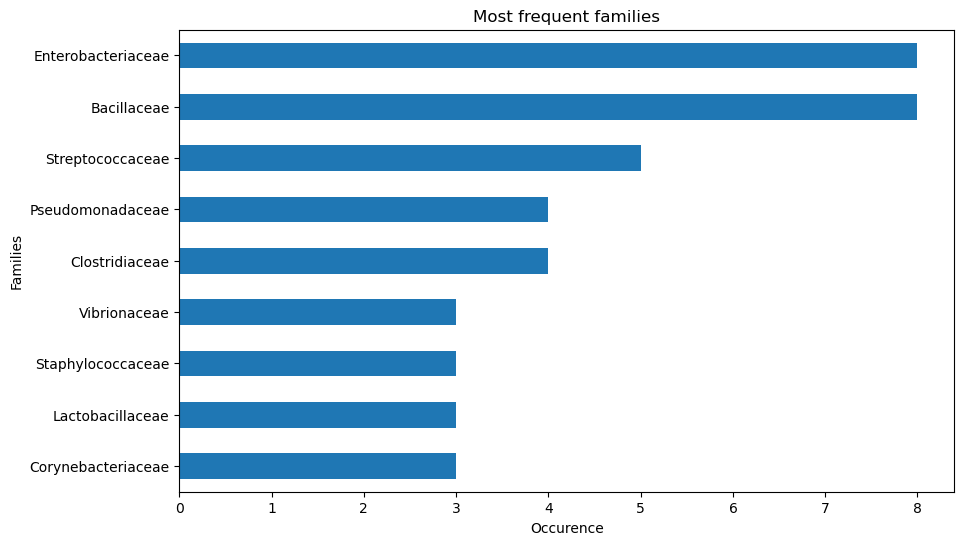

In [6]:
multiple_family.plot(
    kind="barh",
    figsize=(10, 6),
)
plt.title("Most frequent families")
plt.xlabel("Occurence")
plt.ylabel("Families")
plt.show()

## Genus

In [7]:
genus_all = df.groupby("Genus").size()
multiple_genus = genus_all[genus_all > 2].sort_values()

print(f"There are {len(multiple_genus)} genera occuring more than two\n")
print(multiple_genus)

There are 8 genera occuring more than two

Genus
Corynebacterium    3
Lactobacillus      3
Staphylococcus     3
Vibrio             3
Clostridium        4
Pseudomonas        4
Streptococcus      5
Bacillus           6
dtype: int64


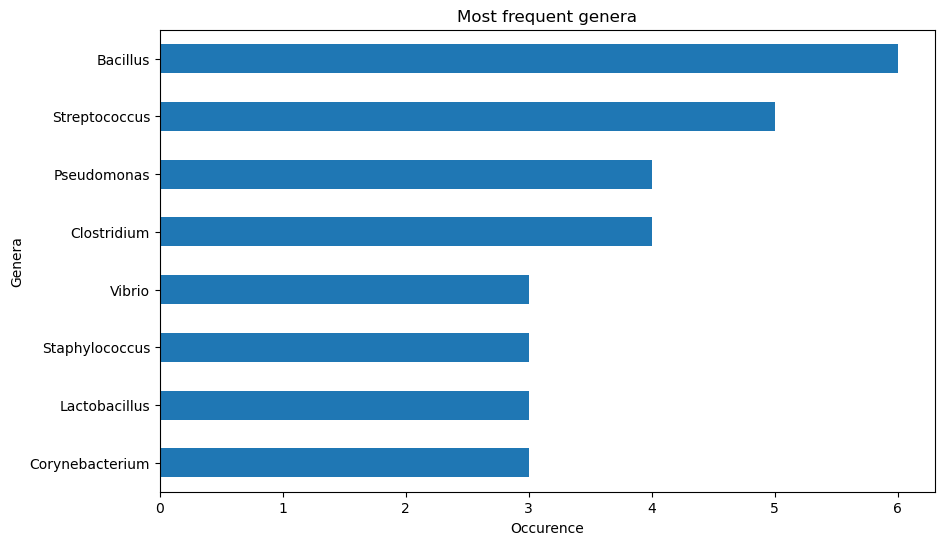

In [8]:
multiple_genus.plot(
    kind="barh",
    figsize=(10, 6),
)
plt.title("Most frequent genera")
plt.xlabel("Occurence")
plt.ylabel("Genera")
plt.show()

## Gram Stain

In [9]:
# Count Gram stain results

gram_stain = df.groupby("Gram Stain").size()
print(gram_stain)

Gram Stain
Negative    37
None         1
Positive    32
dtype: int64


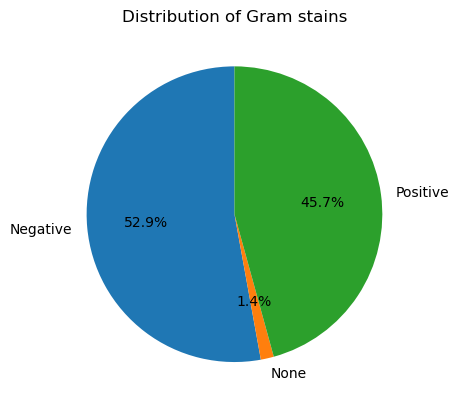

In [10]:
plt.pie(gram_stain, labels=gram_stain.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Gram stains")
plt.show()

In [11]:
gram_positive_text = "Gram positive species"
gram_positive_df = df[df["Gram Stain"] == "Positive"]
gram_positive_species = gram_positive_df.apply(
    lambda row: f"{row['Genus']} {row['Species']}", axis=1
).tolist()

print(gram_positive_species)
print(f"There are {gram_positive_df.shape[0]} {gram_positive_text}")

['Bacillus anthracis', 'Bacillus cereus', 'Bacillus halodurans', 'Priestia megaterium', 'Bacillus pumilus', 'Geobacillus stearothermophilus', 'Bacillus subtilis', 'Bacillus thuringiensis', 'Clostridium botulinum', 'Clostridium difficile', 'Clostridium perfringens', 'Clostridium tetani', 'Corynebacterium diphtheriae', 'Corynebacterium jeikeium', 'Corynebacterium urolithicum', 'Lactobacillus acidophilus', 'Lactobacillus plantarum', 'Lactobacillus reuteri', 'Listeria monocytogenes', 'Micrococcus luteus', 'Mycobacterium tuberculosis', 'Nocardia asteroides', 'Rhodococcus rhodochrous', 'Propionibacterium acnes', 'Staphylococcus aureus', 'Staphylococcus epidermidis', 'Staphylococcus haemolyticus', 'Streptococcus agalactiae', 'Streptococcus mutans', 'Streptococcus pneumoniae', 'Streptococcus pyogenes', 'Streptococcus viridans']
There are 32 Gram positive species


In [12]:
gram_negative_text = "Gram negative species"
gram_negative_df = df[df["Gram Stain"] == "Negative"]
gram_negative_species = gram_negative_df.apply(
    lambda row: f"{row['Genus']} {row['Species']}", axis=1
).tolist()

print(gram_negative_species)
print(f"There are {gram_negative_df.shape[0]} {gram_negative_text}")

['Acetobacter aceti', 'Alcaligenes faecalis', 'Campylobacter jejuni', 'Helicobacter pylori', 'Chromobacterium violaceum', 'Oscillatoria princeps', 'Enterobacter aerogenes', 'Enterobacter cloacae', 'Escherichia coli', 'Klebsiella pneumoniae', 'Salmonella enterica', 'Salmonella typhimurium', 'Shigella dysenteriae', 'Yersinia pestis', 'Halobacterium salinarum', 'Halomonas elongata', 'Leptospira interrogans', 'Acinetobacter baumannii', 'Moraxella catarrhalis', 'Proteus mirabilis', 'Neisseria gonorrhoeae', 'Neisseria mucosa', 'Nostoc commune', 'Planctomycetes brasiliensis', 'Pseudomonas aeruginosa', 'Pseudomonas fluorescens', 'Pseudomonas putida', 'Pseudomonas stutzeri', 'Rhodospirillum rubrum', 'Salinibacter ruber', 'Serratia marcescens', 'Spirillum volutans', 'Spirochaeta africana', 'Treponema pallidum', 'Vibrio cholerae', 'Vibrio parahaemolyticus', 'Vibrio vulnificus']
There are 37 Gram negative species


## Shape

In [13]:
shapes = df.groupby("Shape").size()
print(shapes)

Shape
Coccobacillus      1
Diplococcus        3
Filamentous        4
Pleomorphic        1
Rod               42
Spiral             5
Spirillum          2
Staphylococcus     3
Streptococcus      5
Tetrad             1
Vibrio             3
dtype: int64


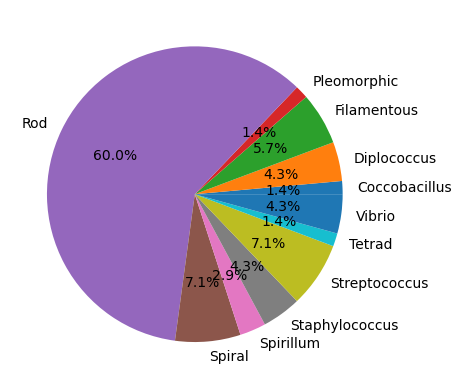

In [14]:
plt.pie(shapes, labels=shapes.index, autopct="%1.1f%%", startangle=0)
plt.show()

In [15]:
sphere_shapes = [
    "Coccobacillus",
    "Diplococcus",
    "Staphylococcus",
    "Streptococcus",
    "Tetrad",
]
spiral_shapes = ["Spiral", "Spirillum"]
other_shapes = ["Filamentous", "Pleomorphic", "Vibrio"]

In [16]:
rod_shape_text = "Rod shape species"
rod_shape_df = df[df["Shape"] == "Rod"]
rod_shape_species = rod_shape_df.apply(
    lambda row: f"{row['Genus']} {row['Species']}", axis=1
)

print(f"There are {rod_shape_df.shape[0]} {rod_shape_text}")

There are 42 Rod shape species


In [17]:
sphere_shape_text = "Sphere shape species"
sphere_shape_df = df[df["Shape"].isin(sphere_shapes)]
sphere_shape_species = sphere_shape_df.apply(
    lambda row: f"{row['Genus']} {row['Species']}", axis=1
)

print(f"There are {sphere_shape_df.shape[0]} {sphere_shape_text}")

There are 13 Sphere shape species


In [18]:
other_shape_text = "NOT rod/sphere shape species"
other_shape_df = df[df["Shape"].isin(other_shapes)]
other_shape_species = other_shape_df.apply(
    lambda row: f"{row['Genus']} {row['Species']}", axis=1
)

print(f"There are {other_shape_df.shape[0]} {other_shape_text}")

There are 8 NOT rod/sphere shape species


## GC Content

In [35]:
mean = df["GC Content"].mean()
print(f"Mean: {mean:.2f}")

mode = df["GC Content"].mode()
print(f"Mode: {mode.tolist()}")

Mean: 47.59
Mode: [38, 55]


In [40]:
less_than_40_gc_content_text = "GC content <= 40%"
less_than_40_gc_content_df = df[df["GC Content"] <= 40]

between_40_60_gc_content_text = "40% < GC content < 60%"
between_40_60_gc_content_df = df[(df["GC Content"] > 40) & (df["GC Content"] < 60)]

more_than_60_gc_content_text = "GC content >= 60%"
more_than_60_gc_content_df = df[df["GC Content"] >= 60]

print(f"{less_than_40_gc_content_text}: \t{less_than_40_gc_content_df.shape[0]}")
print(f"{between_40_60_gc_content_text}: {between_40_60_gc_content_df.shape[0]}")
print(f"{more_than_60_gc_content_text}: \t{more_than_60_gc_content_df.shape[0]}")

GC content <= 40%: 	24
40% < GC content < 60%: 31
GC content >= 60%: 	15


## Get Pairs for Game

In [20]:
properties = [
    (gram_positive_text, gram_positive_df),
    (gram_negative_text, gram_negative_df),
    (less_than_40_gc_content_text, less_than_40_gc_content_df),
    (between_40_60_gc_content_text, between_40_60_gc_content_df),
    (more_than_60_gc_content_text, more_than_60_gc_content_df),
    (rod_shape_text, rod_shape_df),
    (sphere_shape_text, sphere_shape_df),
    (other_shape_text, other_shape_df),
]

In [21]:
def get_property_intersection(prop1, prop2):
    return pd.merge(prop1, prop2)

In [43]:
def get_working_pairs(props):
    working_pairs = []

    for i, prop1 in enumerate(props):
        for j, prop2 in enumerate(props):
            if j > i:
                merged_df = get_property_intersection(prop1[1], prop2[1])
                if merged_df.shape[0] > 4:
                    merged_df_length = merged_df.shape[0]
                    working_pairs.append((prop1, prop2, merged_df, merged_df_length))

    return working_pairs

In [44]:
working_pairs = get_working_pairs(properties)

for pair in working_pairs:
    print(f"{pair[0][0]} with {pair[1][0]} (length: {pair[3]})")

Gram positive species with GC content <= 40% (length: 19)
Gram positive species with 40% < GC content < 60% (length: 6)
Gram positive species with GC content >= 60% (length: 7)
Gram positive species with Rod shape species (length: 22)
Gram positive species with Sphere shape species (length: 9)
Gram negative species with 40% < GC content < 60% (length: 25)
Gram negative species with GC content >= 60% (length: 8)
Gram negative species with Rod shape species (length: 20)
Gram negative species with NOT rod/sphere shape species (length: 6)
GC content <= 40% with Rod shape species (length: 12)
GC content <= 40% with Sphere shape species (length: 9)
40% < GC content < 60% with Rod shape species (length: 18)
40% < GC content < 60% with NOT rod/sphere shape species (length: 6)
GC content >= 60% with Rod shape species (length: 12)
